### Скачайте материалы к ДЗ из личного кабинета. 
### Пpоанализируйте ряды, сделайте их стационарными.
### Решением будет ссылка на гитхаб с ноутбуком

In [3]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [4]:
#!ls

In [5]:
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv",sep=',')
auto_registration = pd.read_csv("monthly-us-auto-registration-tho.csv",sep=';')

In [6]:
auto_registration.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 2 columns):
Month                                                     264 non-null object
Monthly U.S. auto registration (thousands) 1947 ? 1968    264 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.2+ KB


In [13]:
dowjones_closing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 2 columns):
Week                                                                            162 non-null object
Weekly closings of the Dow-Jones industrial average, July 1971 ? August 1974    162 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


In [14]:
# Заберем только ряд
auto_registration=auto_registration.iloc[:,1]
dowjones_closing=dowjones_closing.iloc[:,1]

In [8]:
def test_stationarity(timeseries,print_type='all'):
    
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    if print_type=='all':
        print('Results of Dickey-Fuller Test:')
        print(dfoutput)
    else: 
        return dfoutput['p-value']
    
    
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    majorLocator = MultipleLocator(20)
    majorFormatter = FormatStrFormatter('%d')
    minorLocator = MultipleLocator(5)
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
        #ts_ax.xaxis.set_major_locator(majorLocator)
        #ts_ax.xaxis.set_major_formatter(majorFormatter)
        ts_ax.tick_params(which='minor', length=7, color='r')
# for the minor ticks, use no labels; default NullFormatter
        ts_ax.xaxis.set_minor_locator(minorLocator)
    return

### Dowjones_closing

#### Посмотрим на оригинальный ряд

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


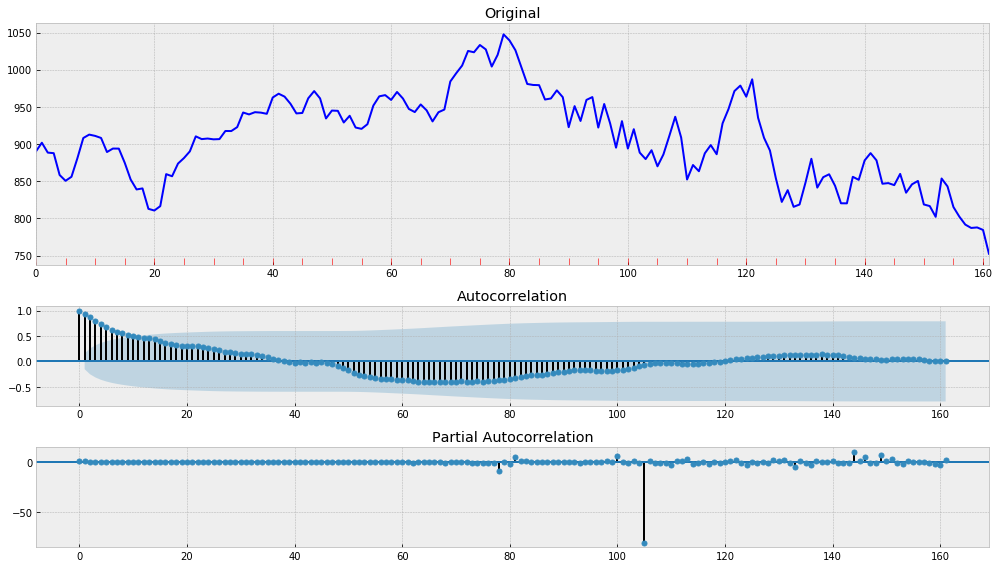

In [18]:
tsplot(dowjones_closing)

* Из DF-тест  и и графиков коррелограмм мы видим, что не можем отвергунуть гипотезу о нестационарности рядя . <br>
* Еще есть ощущение что у нас тут 2 тренда- до 80 периода -растущий , после-падающий <br>
* Сезонности какой-то не видно <br>


#### Попробуем с применить преобразование Бокса-Коса

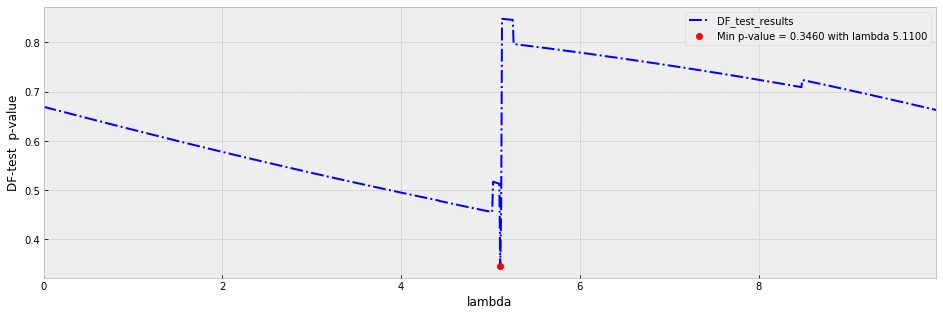

In [81]:
# Подберем лучшую lambda , оиентируюся на p-value
LAMBDA=[]
DF_TEST_Result=[]
for lmda in np.arange(0, 10, .01):
    LAMBDA.append(lmda)
    series = boxcox(dowjones_closing,lmda)
    
    DF_TEST_Result.append(test_stationarity(series,'any'))
    #print(lmda,test_stationarity(series,'any'))
new_df=pd.DataFrame(DF_TEST_Result,index=LAMBDA)

with plt.style.context('bmh'):
        plt.figure(figsize=(16, 5))
        ts_ax = plt.axes()
        line=new_df
        line.plot(ax=ts_ax, color='blue',style='-.')
        dot=new_df[new_df==min(DF_TEST_Result)].dropna()
        dot.plot(ax=ts_ax, style='ro')
        ts_ax.legend(['DF_test_results','Min p-value = {:.4f} with lambda {:.4f}'
                      .format(float(new_df[new_df==min(DF_TEST_Result)].dropna().values),
                          new_df[new_df==min(DF_TEST_Result)].dropna().index[0])])
        ts_ax.set_xlabel('lambda')
        ts_ax.set_ylabel('DF-test  p-value')

In [59]:
dowjones_closing_box_cox_5_11 = boxcox(dowjones_closing,5.11)

Results of Dickey-Fuller Test:
Test Statistic                  -1.870619
p-value                          0.346007
#Lags Used                       5.000000
Number of Observations Used    156.000000
Critical Value (1%)             -3.472979
Critical Value (5%)             -2.880252
Critical Value (10%)            -2.576747
dtype: float64


Results of Dickey-Fuller Test:
Test Statistic                  -1.870619
p-value                          0.346007
#Lags Used                       5.000000
Number of Observations Used    156.000000
Critical Value (1%)             -3.472979
Critical Value (5%)             -2.880252
Critical Value (10%)            -2.576747
dtype: float64


C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


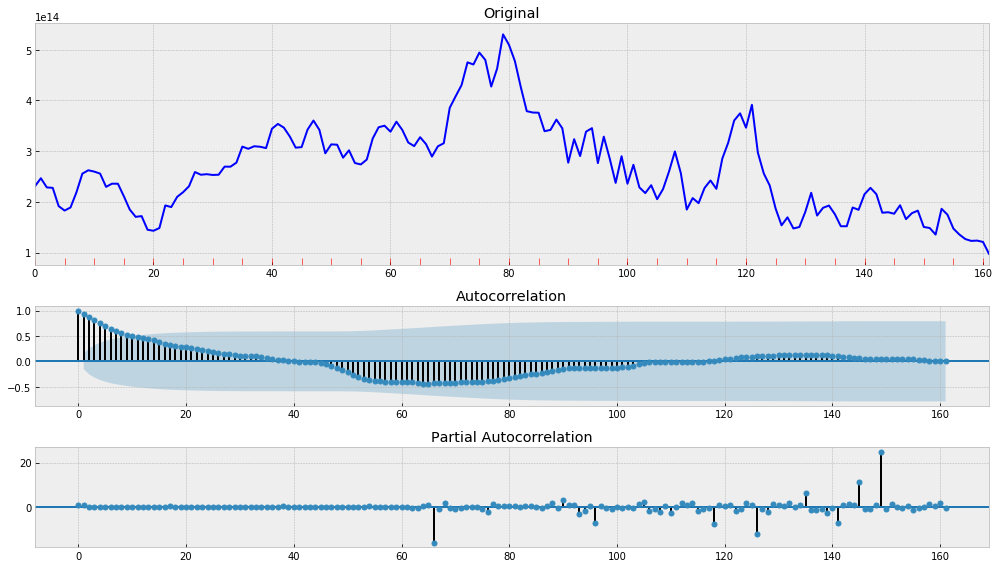

In [60]:
tsplot(dowjones_closing_box_cox_5_11)

#### Попробуем дифференцирование

Results of Dickey-Fuller Test:
Test Statistic                  -5.589921
p-value                          0.000001
#Lags Used                       5.000000
Number of Observations Used    155.000000
Critical Value (1%)             -3.473259
Critical Value (5%)             -2.880374
Critical Value (10%)            -2.576812
dtype: float64


C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


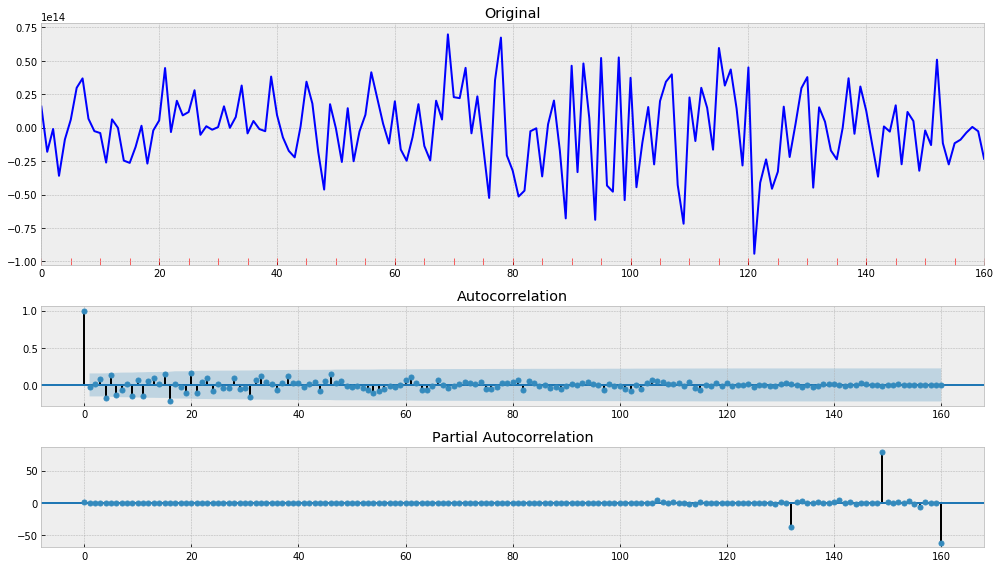

In [67]:
dowjones_closing_box_cox_5_11_diff_1=np.diff(dowjones_closing_box_cox_5_11, 1)
tsplot(dowjones_closing_box_cox_5_11_diff_1)

Стало лучше, DF -test отвергает гипотезу о нестационарности ряда. Однако графики корелляции выглядят не очень красиво-таки пристувуют выбросы

2-ное диффернцирование

Results of Dickey-Fuller Test:
Test Statistic                  -4.898228
p-value                          0.000035
#Lags Used                      14.000000
Number of Observations Used    145.000000
Critical Value (1%)             -3.476273
Critical Value (5%)             -2.881688
Critical Value (10%)            -2.577513
dtype: float64


C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


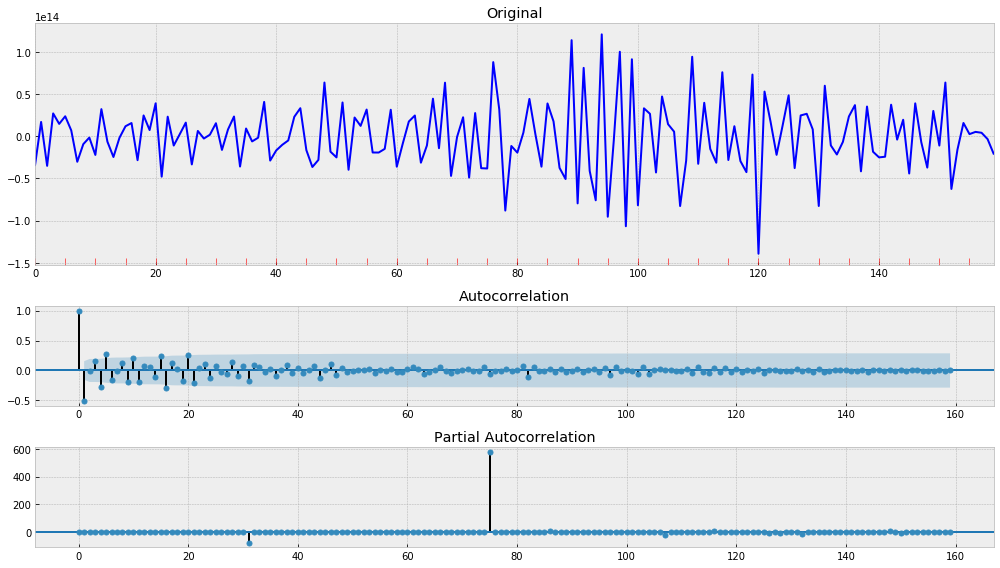

In [66]:
dowjones_closing_box_cox_5_11_diff_2=np.diff(dowjones_closing_box_cox_5_11, 2)
tsplot(dowjones_closing_box_cox_5_11_diff_1)

В целом, похоже что ряд стационарен

#### Ранее было наблюдение, что у нас 2 тренда. Попробуем трактовать этот ряд как 2 ряда

In [92]:
#Разделим его
dowjones_closing_before=dowjones_closing[:80]
dowjones_closing_after=dowjones_closing[80:]

Results of Dickey-Fuller Test:
Test Statistic                 -0.566289
p-value                         0.878419
#Lags Used                      1.000000
Number of Observations Used    78.000000
Critical Value (1%)            -3.517114
Critical Value (5%)            -2.899375
Critical Value (10%)           -2.586955
dtype: float64


C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


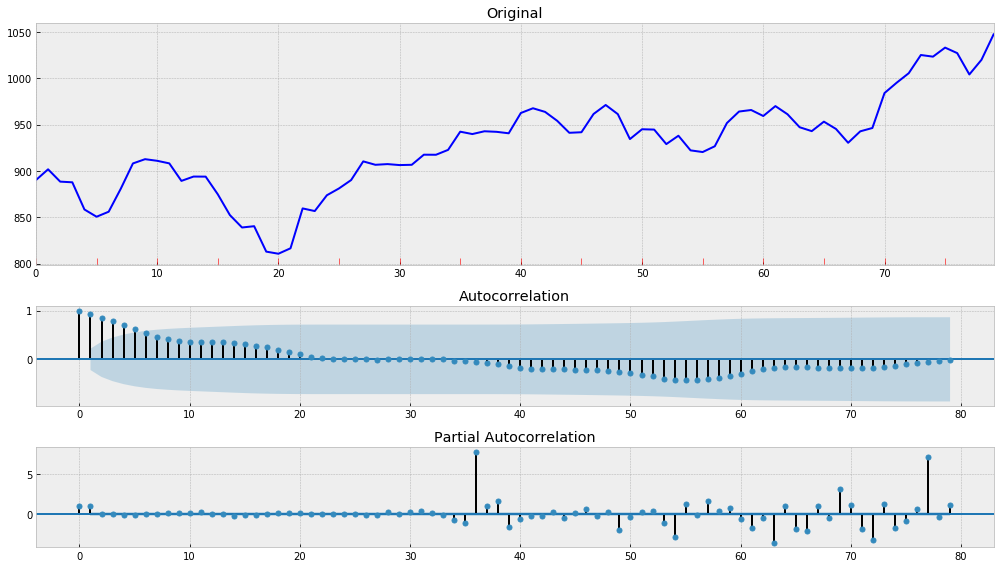

In [85]:
tsplot(dowjones_closing_before)

p-value( 0.878419) >0.05 ===> Не можем отвергнуть нулевую гипотезу о нестационарности ряда.


#### Попробуем с применить преобразование Бокса-Коса

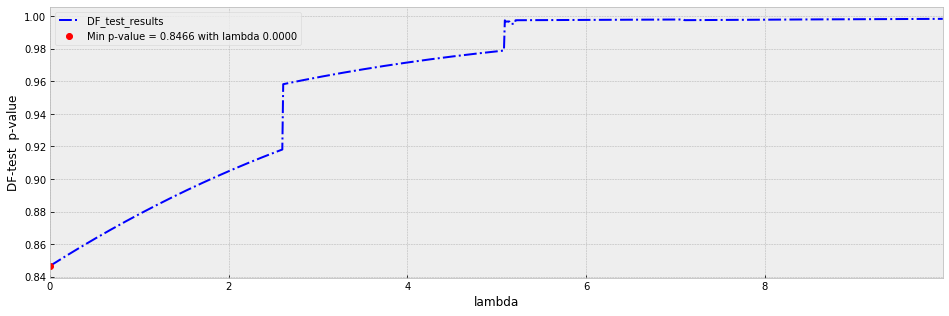

In [86]:
# Подберем лучшую lambda , оиентируюся на p-value
LAMBDA=[]
DF_TEST_Result=[]
for lmda in np.arange(0, 10, .01):
    LAMBDA.append(lmda)
    series = boxcox(dowjones_closing_before,lmda)
    
    DF_TEST_Result.append(test_stationarity(series,'any'))
    #print(lmda,test_stationarity(series,'any'))
new_df=pd.DataFrame(DF_TEST_Result,index=LAMBDA)

with plt.style.context('bmh'):
        plt.figure(figsize=(16, 5))
        ts_ax = plt.axes()
        line=new_df
        line.plot(ax=ts_ax, color='blue',style='-.')
        dot=new_df[new_df==min(DF_TEST_Result)].dropna()
        dot.plot(ax=ts_ax, style='ro')
        ts_ax.legend(['DF_test_results','Min p-value = {:.4f} with lambda {:.4f}'
                      .format(float(new_df[new_df==min(DF_TEST_Result)].dropna().values),
                          new_df[new_df==min(DF_TEST_Result)].dropna().index[0])])
        ts_ax.set_xlabel('lambda')
        ts_ax.set_ylabel('DF-test  p-value')

Results of Dickey-Fuller Test:
Test Statistic                 -0.700725
p-value                         0.846562
#Lags Used                      1.000000
Number of Observations Used    78.000000
Critical Value (1%)            -3.517114
Critical Value (5%)            -2.899375
Critical Value (10%)           -2.586955
dtype: float64


C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


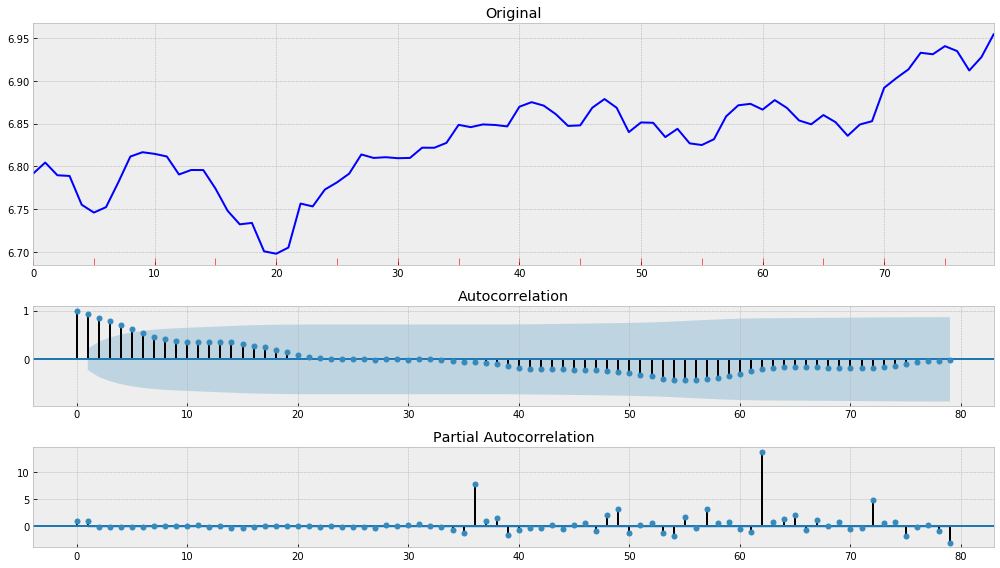

In [88]:
dowjones_closing_before_box_cox_0 = boxcox(dowjones_closing_before,0)
tsplot(dowjones_closing_before_box_cox_0)

Дисперсия ряда снизилась, однако ряд все еще нестанионарен.

#### Попробуем дифференцирование

Results of Dickey-Fuller Test:
Test Statistic                -6.949744e+00
p-value                        9.761981e-10
#Lags Used                     0.000000e+00
Number of Observations Used    7.800000e+01
Critical Value (1%)           -3.517114e+00
Critical Value (5%)           -2.899375e+00
Critical Value (10%)          -2.586955e+00
dtype: float64


C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


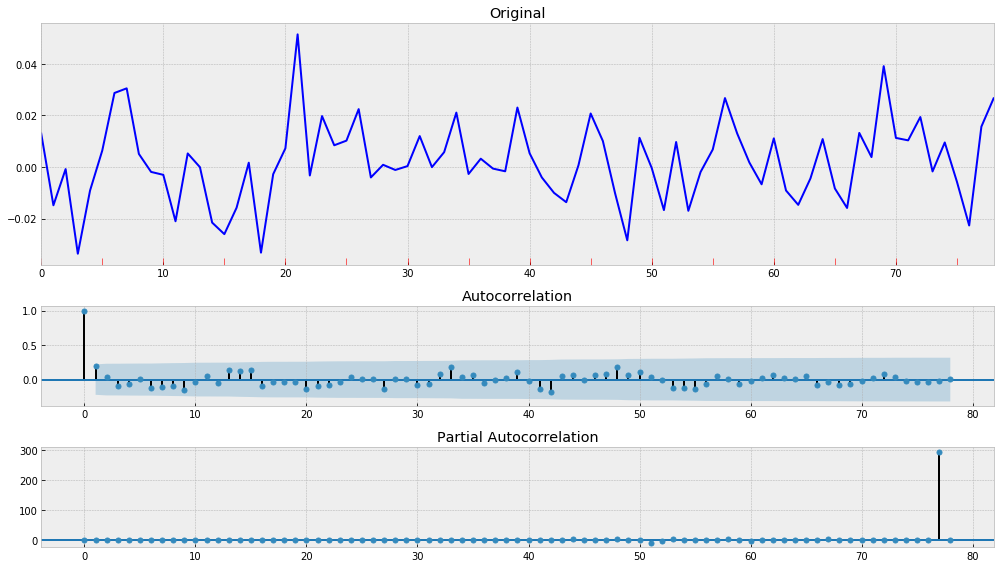

In [89]:
dowjones_closing_before_box_cox_0_diff_1=np.diff(dowjones_closing_before_box_cox_0, 1)
tsplot(dowjones_closing_before_box_cox_0_diff_1)

p-value   =9.761981e-10 <0.05, автокооряляция находится в рамхках доверительного интревла, частичная автокоррялция содержит всего один выброс  ==>>  можем отвергунуть гипотезу о нестационарности рядя .  

Results of Dickey-Fuller Test:
Test Statistic                 -1.954633
p-value                         0.306812
#Lags Used                      0.000000
Number of Observations Used    81.000000
Critical Value (1%)            -3.513790
Critical Value (5%)            -2.897943
Critical Value (10%)           -2.586191
dtype: float64


C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


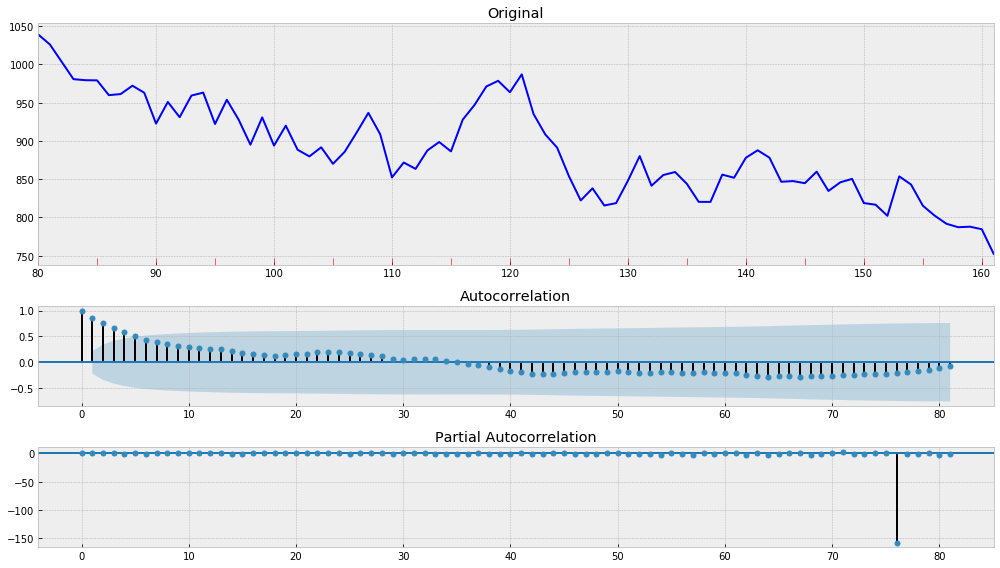

In [93]:
tsplot(dowjones_closing_after)

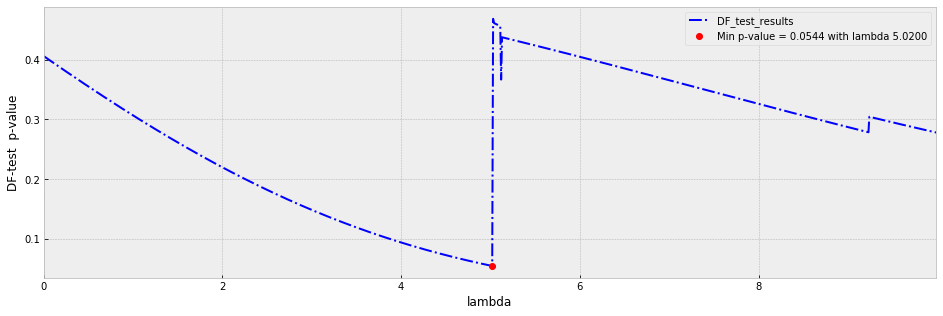

In [94]:
# Подберем лучшую lambda , оиентируюся на p-value
LAMBDA=[]
DF_TEST_Result=[]
for lmda in np.arange(0, 10, .01):
    LAMBDA.append(lmda)
    series = boxcox(dowjones_closing_after,lmda)
    
    DF_TEST_Result.append(test_stationarity(series,'any'))
    #print(lmda,test_stationarity(series,'any'))
new_df=pd.DataFrame(DF_TEST_Result,index=LAMBDA)

with plt.style.context('bmh'):
        plt.figure(figsize=(16, 5))
        ts_ax = plt.axes()
        line=new_df
        line.plot(ax=ts_ax, color='blue',style='-.')
        dot=new_df[new_df==min(DF_TEST_Result)].dropna()
        dot.plot(ax=ts_ax, style='ro')
        ts_ax.legend(['DF_test_results','Min p-value = {:.4f} with lambda {:.4f}'
                      .format(float(new_df[new_df==min(DF_TEST_Result)].dropna().values),
                          new_df[new_df==min(DF_TEST_Result)].dropna().index[0])])
        ts_ax.set_xlabel('lambda')
        ts_ax.set_ylabel('DF-test  p-value')

Results of Dickey-Fuller Test:
Test Statistic                 -2.828007
p-value                         0.054383
#Lags Used                      0.000000
Number of Observations Used    81.000000
Critical Value (1%)            -3.513790
Critical Value (5%)            -2.897943
Critical Value (10%)           -2.586191
dtype: float64


C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


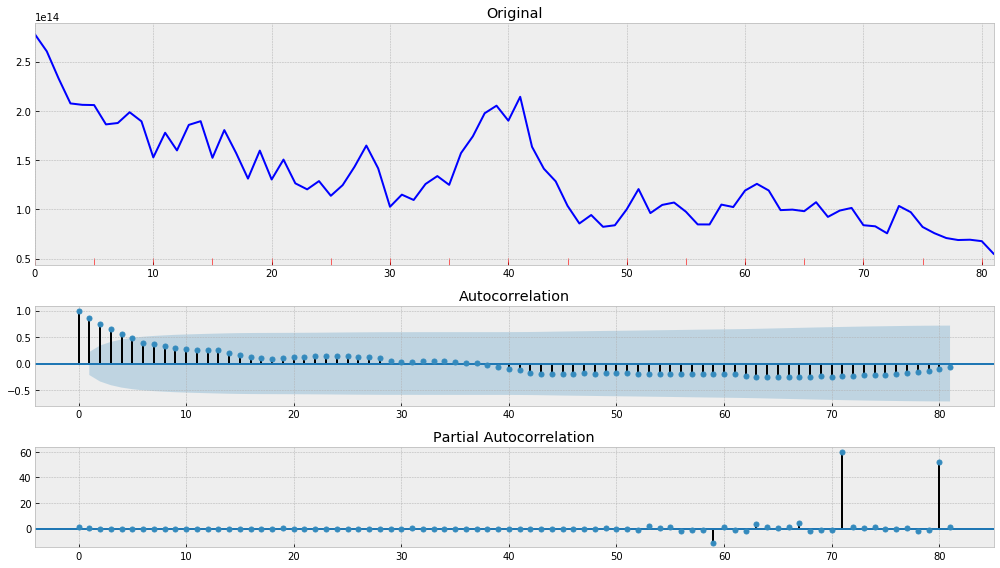

In [96]:
dowjones_closing_after_box_cox_5_02 = boxcox(dowjones_closing_after,5.02)
tsplot(dowjones_closing_after_box_cox_5_02)

Дисперсия ряда снизилась, однако ряд все еще нестанионарен.

#### Попробуем дифференцирование

Results of Dickey-Fuller Test:
Test Statistic                 -4.576358
p-value                         0.000143
#Lags Used                      5.000000
Number of Observations Used    75.000000
Critical Value (1%)            -3.520713
Critical Value (5%)            -2.900925
Critical Value (10%)           -2.587781
dtype: float64


C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


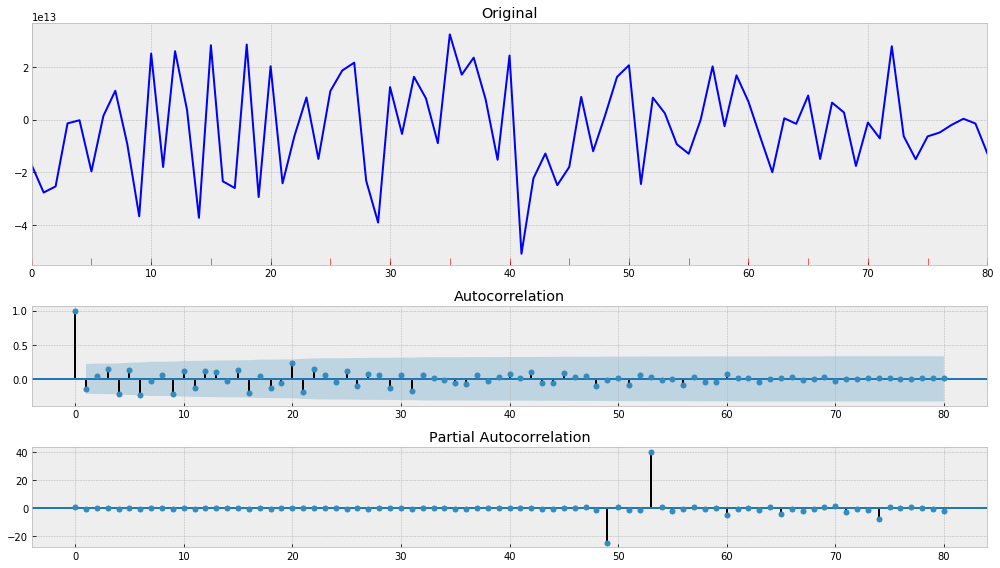

In [97]:
dowjones_closing_after_box_cox_5_02_diff_1=np.diff(dowjones_closing_after_box_cox_5_02, 1)
tsplot(dowjones_closing_after_box_cox_5_02_diff_1)

p-value   =0.000143 <0.05, автокооряляция находится в рамхках доверительного интревла, частичная автокоррялция содержит 2  выбросa  ==>>  можем отвергунуть гипотезу о нестационарности рядя . 

### Auto_registration

#### Посмотрим на оригинальный ряд

Results of Dickey-Fuller Test:
Test Statistic                  -1.225039
p-value                          0.662733
#Lags Used                      15.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


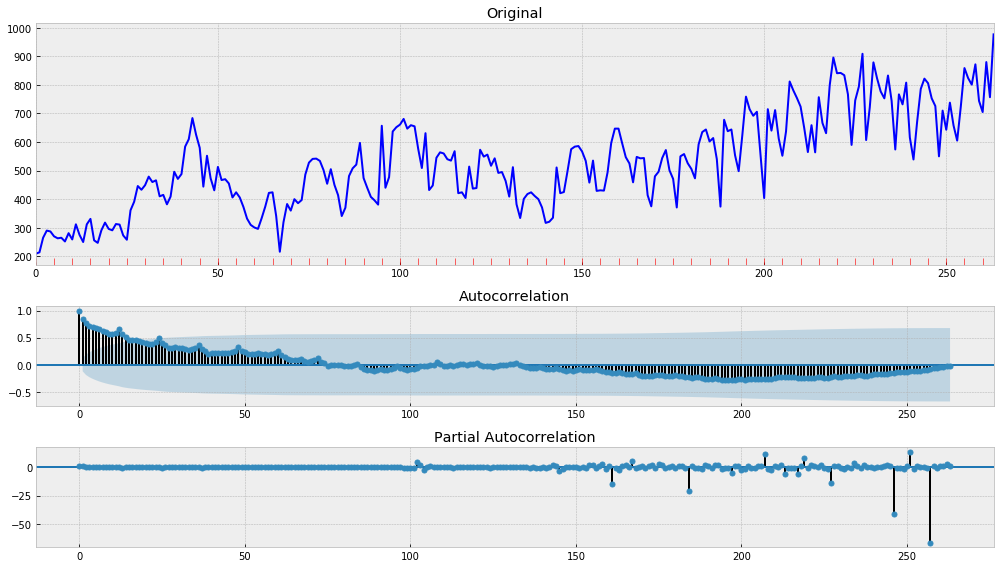

In [99]:
tsplot(auto_registration)

* Из DF-тест  и и графиков коррелограмм мы видим, что не можем отвергунуть гипотезу о нестационарности рядя . <br>
* Видимо пристувует тренд
* Есть ощущение, что наблюдается сезонность


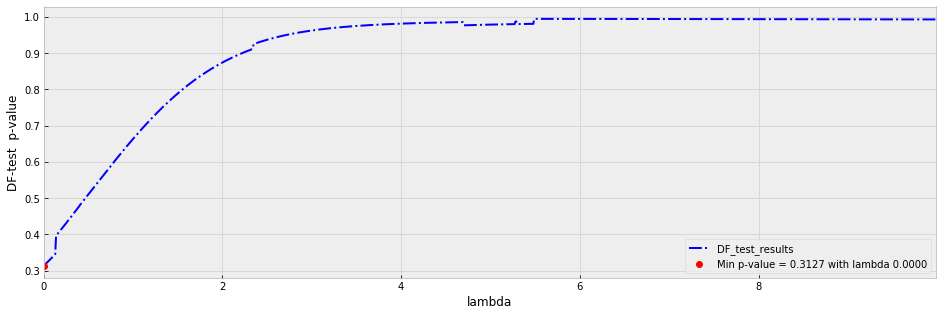

In [100]:
# Подберем лучшую lambda , оиентируюся на p-value
LAMBDA=[]
DF_TEST_Result=[]
for lmda in np.arange(0, 10, .01):
    LAMBDA.append(lmda)
    series = boxcox(auto_registration,lmda)
    
    DF_TEST_Result.append(test_stationarity(series,'any'))
    #print(lmda,test_stationarity(series,'any'))
new_df=pd.DataFrame(DF_TEST_Result,index=LAMBDA)

with plt.style.context('bmh'):
        plt.figure(figsize=(16, 5))
        ts_ax = plt.axes()
        line=new_df
        line.plot(ax=ts_ax, color='blue',style='-.')
        dot=new_df[new_df==min(DF_TEST_Result)].dropna()
        dot.plot(ax=ts_ax, style='ro')
        ts_ax.legend(['DF_test_results','Min p-value = {:.4f} with lambda {:.4f}'
                      .format(float(new_df[new_df==min(DF_TEST_Result)].dropna().values),
                          new_df[new_df==min(DF_TEST_Result)].dropna().index[0])])
        ts_ax.set_xlabel('lambda')
        ts_ax.set_ylabel('DF-test  p-value')

Results of Dickey-Fuller Test:
Test Statistic                  -1.941628
p-value                          0.312738
#Lags Used                      14.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


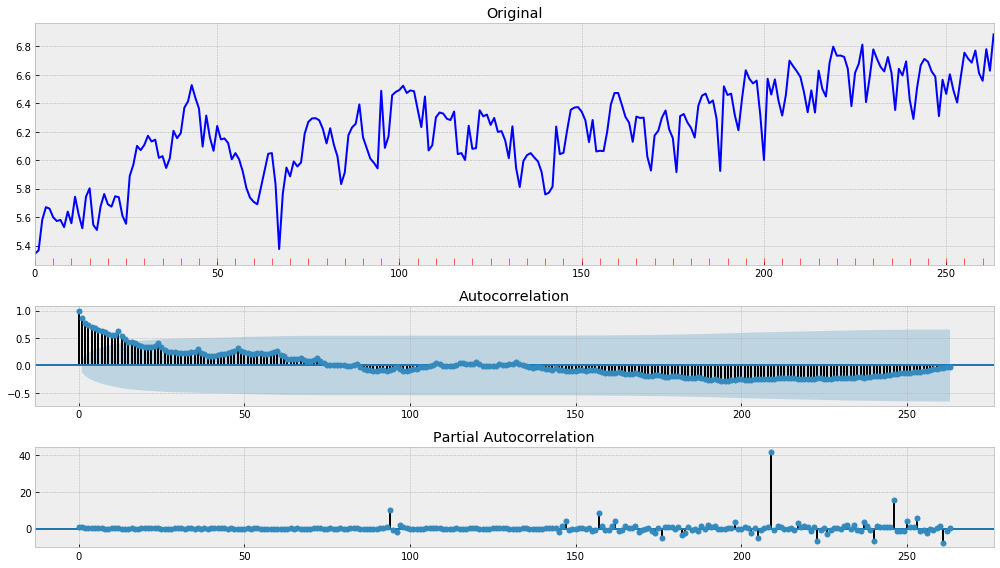

In [102]:
auto_registration_box_cox_0= boxcox(auto_registration,0)
tsplot(auto_registration_box_cox_0)

#### Попробуем дифференцирование

Results of Dickey-Fuller Test:
Test Statistic                  -4.362471
p-value                          0.000346
#Lags Used                      14.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


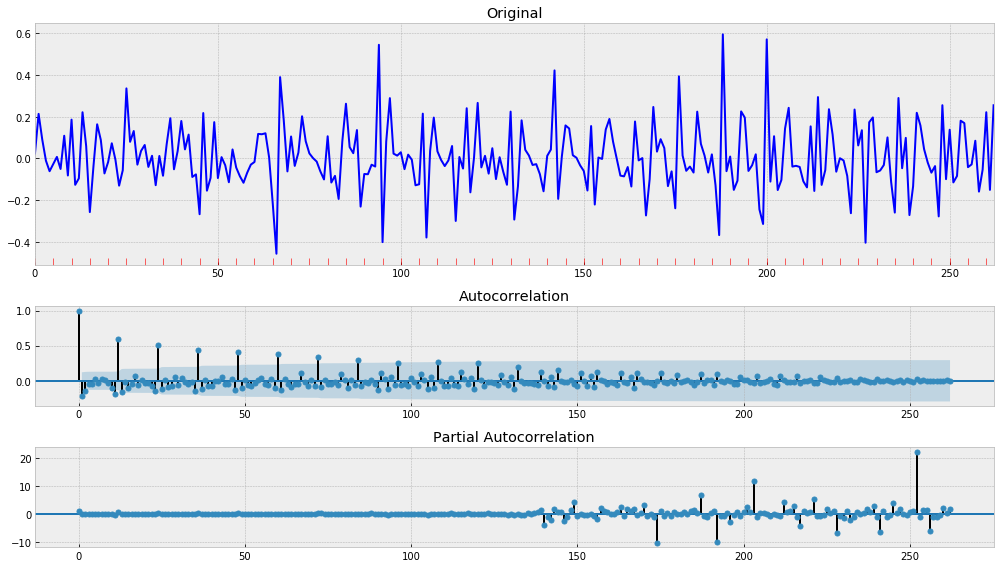

In [103]:
auto_registration_box_cox_0_diff_1=np.diff(auto_registration_box_cox_0, 1)
tsplot(auto_registration_box_cox_0_diff_1)

Стало лучше, DF -test отвергает гипотезу о нестационарности ряда. Однако графиках корелляции  и частичной коорреляцц выглядят не очень красиво-таки пристувуе множество выбросов. Здесь еще лучше видна сезонность.


#### Попробует исключить сезонность

Results of Dickey-Fuller Test:
Test Statistic                -6.528275e+00
p-value                        1.001817e-08
#Lags Used                     1.200000e+01
Number of Observations Used    2.380000e+02
Critical Value (1%)           -3.458128e+00
Critical Value (5%)           -2.873762e+00
Critical Value (10%)          -2.573283e+00
dtype: float64


C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


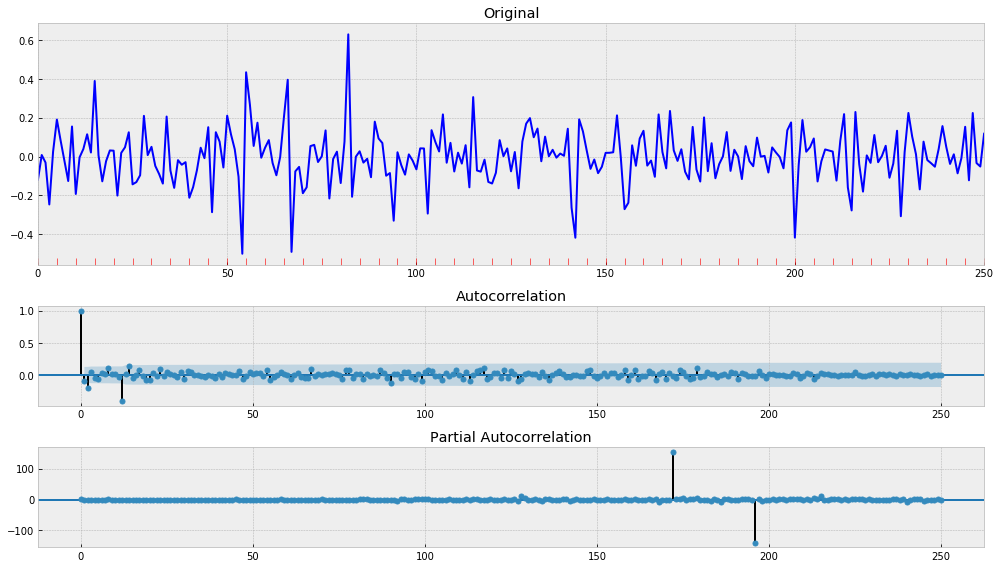

In [128]:
auto_registration_no_season = auto_registration_box_cox_0_diff_1[12:] - auto_registration_box_cox_0_diff_1[:-12]
tsplot(auto_registration_no_season)

 * Послед удаления сезонности, все стало гораздо лучше, из графиков корряляции можно смело сделать вывод о стационарности ряда.
Результаты DF теста поддрекпляют эту уверенность